In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Basic

## Optimization

In [7]:
from scipy.optimize import minimize

Minimize f(x) = (𝑥−3)2 

In [8]:
def f(x):
    return (x-3)**2

res = minimize(f, 2) # 2 is just an initial guess. Doesn't change the result 'res.x'  
print(res)
print("Optimum Value", res.x)

      fun: 5.551437397369767e-17
 hess_inv: array([[0.5]])
      jac: array([-4.3254289e-13])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.99999999])
Optimum Value [2.99999999]


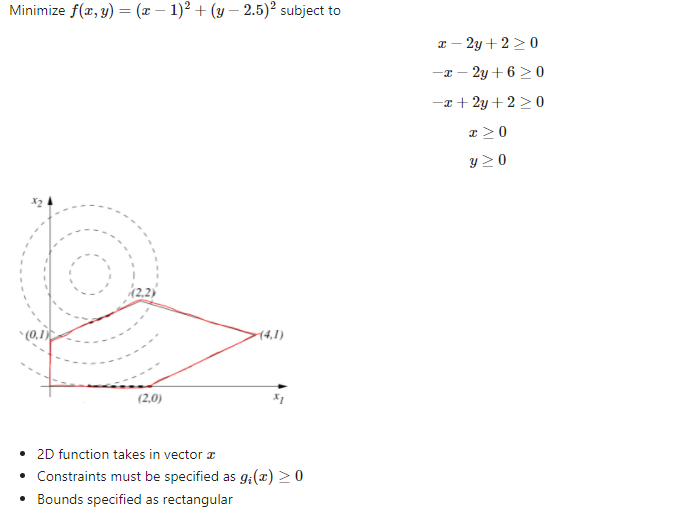

## Lambda Function

In [9]:
f = lambda x: (x[0])**2 + (x[1])**2
f([1,1])

2

In [10]:
# creating above defined funciton using x and y variables
f = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2 
print("f(1,2) = ", f([1,2]))

# defining constraints
# this is the format for scipy minimize constraints
# Note: the 2nd point defined above is the syntax for constraints
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2*x[1]+2},      # first constraint
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
        
# bnds = ( first bracket for x (0, infinity), second bracket for y  (0, infinity))    
bnds = ((0, None), (0, None))    
res = minimize(f, (2,0), bounds=bnds, constraints=cons)
print(res)
print("min 'x' and 'y'", res.x)

f(1,2) =  0.25
     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])
min 'x' and 'y' [1.4 1.7]


### For Documentation in jupyter

In [11]:
# minimize?

# Interpolation 
1. To get the values of curve that are in between
2. To smooth out the any f(x)

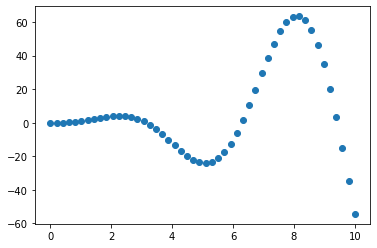

In [12]:
x = np.linspace(0, 10, 50)
y = x**2 * np.sin(x)
# y = x
plt.scatter(x,y)

In [13]:
from scipy.interpolate import interp1d

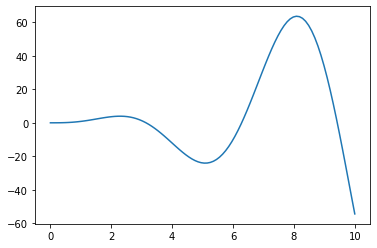

In [14]:
f = interp1d(x, y, kind='cubic')
x_dense = np.linspace(0, 10, 100)
y_dense = f(x_dense)
plt.plot(x_dense, y_dense)

# Curve Fitting

In [15]:
x_data = np.linspace(0, 10, 10)
y_data = 3*x_data**2 + 2

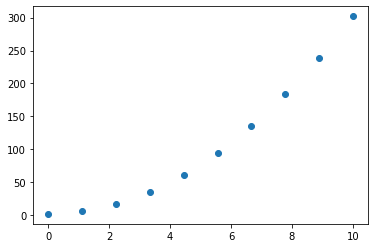

In [16]:
plt.scatter(x_data, y_data)

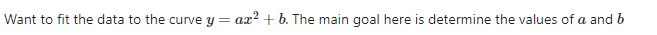

In [17]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x**2 + b

popt, pconv = curve_fit(func, x_data, y_data,)
popt

array([3., 2.])

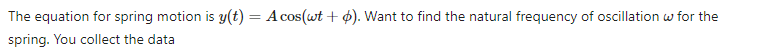

In [18]:
t_data = np.array([ 0.   ,  0.34482759,  0.68965517,  1.03448276,  1.37931034,
        1.72413793,  2.06896552,  2.4137931 ,  2.75862069,  3.10344828,
        3.44827586,  3.79310345,  4.13793103,  4.48275862,  4.82758621,
        5.17241379,  5.51724138,  5.86206897,  6.20689655,  6.55172414,
        6.89655172,  7.24137931,  7.5862069 ,  7.93103448,  8.27586207,
        8.62068966,  8.96551724,  9.31034483,  9.65517241, 10.        ])
y_data = np.array([ 4.3303953 ,  1.61137995, -2.15418696, -3.90137249, -1.67259042,
        2.16884383,  3.86635998,  1.85194506, -1.8489224 , -3.96560495,
       -2.13385255,  1.59425817,  4.06145238,  1.89300594, -1.76870297,
       -4.26791226, -2.46874133,  1.37019912,  4.24945607,  2.27038039,
       -1.50299303, -3.46774049, -2.50845488,  1.20022052,  3.81633703,
        2.91511556, -1.24569189, -3.72716214, -2.54549857,  0.87262548])

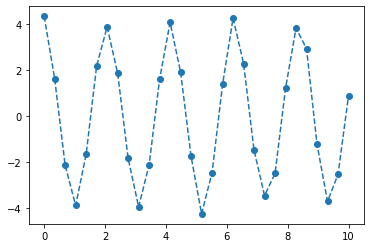

In [19]:
plt.plot(t_data,y_data,'o--')

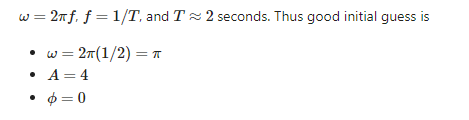

In [29]:
from scipy.optimize import curve_fit

def func(x, A, w, phi):
    return A*(np.cos((w*x)+phi))

popt, pconv = curve_fit(func, t_data, y_data, p0=(4, np.pi, 0))
popt

array([3.94836219, 2.9989952 , 0.10411352])

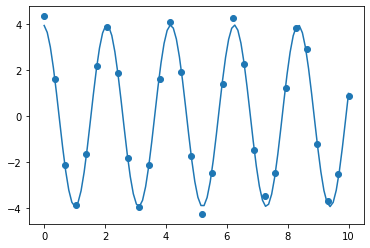

In [30]:
A, w, phi = popt
t = np.linspace(0,10,100)
y = func(t, A, w, phi)
plt.scatter(t_data, y_data)
plt.plot(t,y)

In [31]:
# Extimated Error
np.sqrt(np.diag(pconv))

array([0.05117448, 0.00430857, 0.02575702])

In [32]:
np.diag(pconv)

array([2.61882716e-03, 1.85637431e-05, 6.63424255e-04])

## Special Functions
- Legendre (hydrogen)
- Laplace Equation

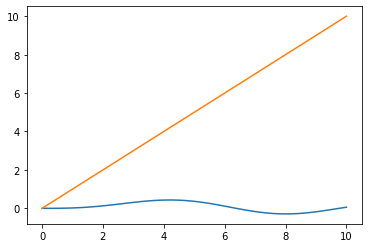

In [49]:
from scipy.special import legendre
from scipy.special import jv

x = np.linspace(0,10,50)

plt.plot(x, jv(3,x))
plt.plot(x, legendre(1)(x))

# Calculus

## Differentiation

In [50]:
from scipy.misc import derivative

In [61]:
def f(x):
    return x**2 * np.sin(2*x) *np.exp(-x)
x = np.linspace(0, 1, 100)

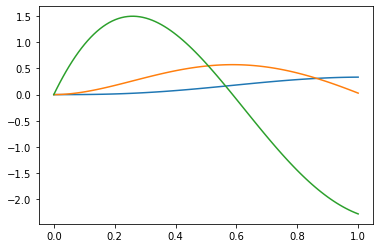

In [67]:
plt.plot(x, f(x))
plt.plot(x, derivative(f, x, dx=1e-6, n=1))
plt.plot(x, derivative(f, x, dx=1e-6, n=2))

## Integration

Single Integral    
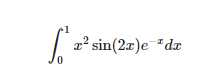

In [69]:
from scipy.integrate import quad

f = lambda x: x**2 * np.sin(2*x) * np.exp(-x)
integral, integral_error = quad(f, 0, 1)
integral

0.14558175869954834

Double Integration
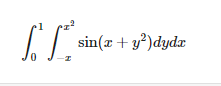

In [72]:
from scipy.integrate import dblquad

f = lambda y, x: np.sin(x + y**2)
lwr_y = lambda x: -x
upr_y = lambda x: x**2

# integral, integral_error = dblquad(f, 0, 1, -x, x**2) Not possible
integral, integral_error = dblquad(f, 0, 1, lwr_y, upr_y)
integral

0.590090324408853